In [1]:
import os
from pathlib import Path
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
p = Path("./smallDataset/")
dirs = p.glob("*")

image_data = []
labels = []
labels_dict = {}
c = 0;

for folder_dir in dirs:
    label = str(folder_dir).split("\\")[-1]
    labels_dict[label] = c
    c+=1
    
    cnt = 0
    for img_path in folder_dir.glob("*.jpg"):
        img = image.load_img(img_path,target_size=(28,28))
        img_array = image.img_to_array(img)
        image_data.append(img_array)
        labels.append(labels_dict[label])
        cnt+=1
    print(cnt)

120
125
155
155
155
160
170
155
165
170
160
160
160
140
160
160
160
155
160
160
160
160
160
160
160
160
160
160
160
160
160
160
156
170
160
160


In [3]:
X = np.array(image_data)
Y = np.array(labels)

from sklearn.utils import shuffle
X,Y = shuffle(X,Y,random_state=2)
X = X/255.0
print(X.shape)

(5671, 28, 28, 3)


In [4]:
split = int(X.shape[0]*.8)
X_ = np.array(X)
Y_ = np.array(Y)

X = X_[:split,:]
Y = Y_[:split]
XTest = X_[split:,:]
YTest = Y_[split:]

In [5]:
def softmax(a):
    ea = np.exp(a)
    ans = ea/np.sum(ea, axis = 1, keepdims = True)
    return ans


In [6]:
class NeuralNetwork:
    def __init__(self, input_size, layers, output_size):
        
        np.random.seed(0)
        
        model = {}
        model['w1'] = np.random.randn(input_size, layers[0])
        model['b1'] = np.zeros((1,layers[0]))
        model['w2'] = np.random.randn(layers[0], layers[1])
        model['b2'] = np.zeros((1,layers[1]))
        model['w3'] = np.random.randn(layers[1], output_size)
        model['b3'] = np.zeros((1,output_size))
        self.model = model 
        
    def forward(self, x):
        w1,w2,w3 = self.model['w1'], self.model['w2'], self.model['w3']
        b1,b2,b3 = self.model['b1'], self.model['b2'], self.model['b3']
        z1 = np.dot(x,w1) + b1
        a1 = np.tanh(z1)
        z2 = np.dot(a1, w2) + b2
        a2 = np.tanh(z2)
        z3 = np.dot(a2, w3) + b3
        y_ = softmax(z3)
        self.activation_outputs = (a1, a2, y_)
        return y_
    
    def backward(self, x, y, learning_rate = 0.001):
        w1,w2,w3 = self.model['w1'], self.model['w2'], self.model['w3']
        b1,b2,b3 = self.model['b1'], self.model['b2'], self.model['b3']
        m = y.shape[0]
        
        a1, a2, y_ = self.activation_outputs
        delta3 = y_ - y
        dw3 = np.dot(a2.T, delta3)
        db3 = np.sum(delta3, axis = 0)
        
        delta2 = (1- np.square(a2))*np.dot(delta3, w3.T)
        dw2 = np.dot(a1.T, delta2)
        db2 = np.sum(delta2, axis = 0)
        
        delta1 = (1-np.square(a1))*np.dot(delta2, w2.T)
        dw1 = np.dot(x.T, delta1)
        db1 = np.sum(delta1 , axis = 0)
        self.model['w1'] -= learning_rate*dw1
        self.model['b1'] -= learning_rate*db1
        self.model['w2'] -= learning_rate*dw2
        self.model['b2'] -= learning_rate*db2
        self.model['w3'] -= learning_rate*dw3
        self.model['b3'] -= learning_rate*db3
    
    def predict(self, x):
        y_out = self.forward(x)
        return np.argmax(y_out, axis = 1)
    
    def summary(self):
        w1,w2,w3 = self.model['w1'], self.model['w2'], self.model['w3']
        
        a1,a2,y_ = self.activation_outputs
        print('w1 ', w1.shape)
        print('a1 ', a1.shape)
        print('w2 ', w2.shape)
        print('a2 ', a2.shape)
        print('w3 ', w3.shape)
        print('y_ ', y_.shape)
    

In [7]:
def loss(y_hot, p):
    l = -np.mean(y_hot*np.log(p))
    return l
def one_hot(y,depth):
    m = y.shape[0]
    y_hot = np.zeros((m,depth))
    y_hot[np.arange(m), y] = 1
    return y_hot

In [8]:
def train(x,y,model,epochs, learning_rate, logs = True):
    training_loss = []
    classes = 36
    y_hot = one_hot(y,classes)
    
    for i in range(epochs):
        y_ = model.forward(x)
        l = loss(y_hot, y_)
        training_loss.append(l)
        model.backward(x,y_hot,learning_rate)
        if(logs):
            print("Epoch %d loss %.4f"%(i,l))
    return training_loss

In [9]:
model = NeuralNetwork(input_size = 2352, layers = [100,50], output_size = 36)

In [10]:
X = X.reshape(X.shape[0],-1)
XTest = XTest.reshape(XTest.shape[0], -1)


In [11]:
l = train(X,Y,model,100, 0.002)

Epoch 0 loss 0.4172
Epoch 1 loss 0.3067
Epoch 2 loss 0.2988
Epoch 3 loss 0.3441
Epoch 4 loss 0.3282
Epoch 5 loss 0.2923
Epoch 6 loss 0.3017
Epoch 7 loss 0.2984
Epoch 8 loss 0.2754
Epoch 9 loss 0.2606
Epoch 10 loss 0.2613
Epoch 11 loss 0.2782
Epoch 12 loss 0.2752
Epoch 13 loss 0.2742
Epoch 14 loss 0.2689
Epoch 15 loss 0.2659
Epoch 16 loss 0.2493
Epoch 17 loss 0.2312
Epoch 18 loss 0.1971
Epoch 19 loss 0.1697
Epoch 20 loss 0.1470
Epoch 21 loss 0.1215
Epoch 22 loss 0.0997
Epoch 23 loss 0.0961
Epoch 24 loss 0.1028
Epoch 25 loss 0.0867
Epoch 26 loss 0.0774
Epoch 27 loss 0.0787
Epoch 28 loss 0.0790
Epoch 29 loss 0.0668
Epoch 30 loss 0.0560
Epoch 31 loss 0.0509
Epoch 32 loss 0.0445
Epoch 33 loss 0.0404
Epoch 34 loss 0.0432
Epoch 35 loss 0.0385
Epoch 36 loss 0.0367
Epoch 37 loss 0.0324
Epoch 38 loss 0.0337
Epoch 39 loss 0.0294
Epoch 40 loss 0.0269
Epoch 41 loss 0.0258
Epoch 42 loss 0.0254
Epoch 43 loss 0.0254
Epoch 44 loss 0.0208
Epoch 45 loss 0.0199
Epoch 46 loss 0.0169
Epoch 47 loss 0.0156
Ep

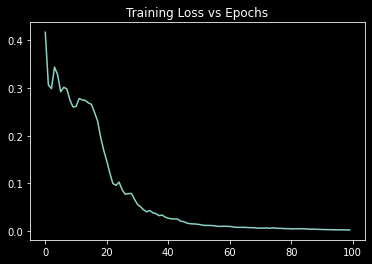

In [12]:
plt.style.use("dark_background")
plt.title("Training Loss vs Epochs")
plt.plot(l)
plt.savefig("MLP Loss function")
plt.show()

In [13]:
def getAccuracy(X,Y,model):
    outputs = model.predict(X)
    acc = np.sum(outputs == Y)/Y.shape[0]
    return acc
print("Train Acc %.4f"%getAccuracy(X,Y,model))
print("Test Acc %.4f"%getAccuracy(XTest,YTest,model))

Train Acc 0.9866
Test Acc 0.7718


In [14]:
outputs = model.predict(XTest)

In [15]:
# print(outputs.shape)

In [16]:
array = np.zeros((36,36), dtype = np.int64)

In [17]:
for i in range(outputs.shape[0]):
    array[YTest[i]][outputs[i]]+=1



In [18]:
import seaborn as sns

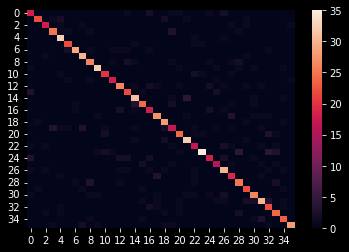

In [19]:
hm = sns.heatmap(array)
fig = hm.get_figure()
fig.savefig("MLP heatmap")